_ML project on Titanic data (prediction of survival)_

# Import and split data 

In [1]:
# Import required modules and functions
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
# Function to train test split the data
from sklearn.model_selection import train_test_split

In [2]:
full_data = pd.read_csv('/Users/philipwitte/Documents/spiced_projects/fenugreek-student-code/week02/data/train.csv')

In [3]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dataset with all features
X = full_data.drop(['Survived'], axis = 1)

In [5]:
# Target variable (isolated)
y = full_data['Survived']

In [6]:
# Train-test-split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 297, stratify = y)#264

In [7]:
# Check shape of split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

# Explorative data analysis

In [8]:
#full_data.columns = [title.lower().replace('id', '_id') for title in full_data.columns]
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


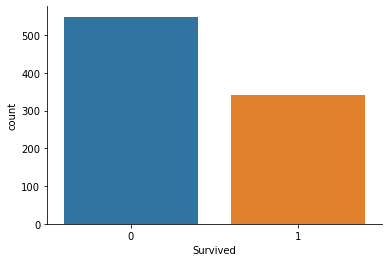

In [10]:
# Number of survived / dead people as bar plot
sns.countplot(data = full_data, x = 'Survived');
sns.despine()

In [11]:
# Share of 1st class passsengers who survived
res = full_data.loc[(full_data['Pclass'] == 1) & (full_data['Survived'] == 1)].Survived.count() 
res / full_data.loc[full_data['Pclass'] == 1].Survived.count()

0.6296296296296297

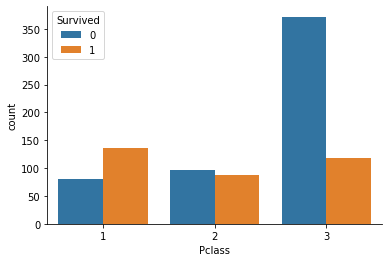

In [12]:
# Bar chart for 1st/2nd/3rd class
sns.countplot(data = full_data, x = 'Pclass', hue = "Survived")
sns.despine()

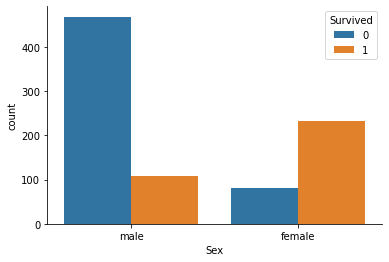

In [13]:
# Bar chart for male/female
sns.countplot(data = full_data, x = 'Sex', hue = "Survived")
sns.despine()

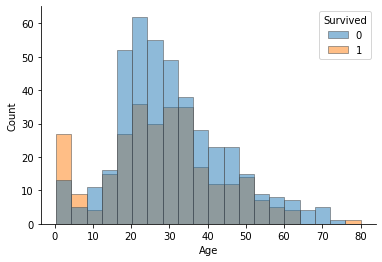

In [14]:
# Age distribution via seaborn
sns.histplot(
    data = full_data,
    x = "Age", hue="Survived",
    multiple='layer',
    edgecolor=".3",
    linewidth=.5,
)

sns.despine()

In [15]:
#mean age of passengers who survived
mean_age_l = full_data[full_data['Survived'] == 1].Age.mean()
mean_age_l

28.343689655172415

In [16]:
#mean age of passengers who drowned
mean_age_d = full_data[full_data['Survived'] == 0].Age.mean()
mean_age_d

30.62617924528302

In [17]:
# Summary for sex and pclass
grouped_data = full_data.groupby(['Pclass','Sex','Survived']).Sex.count()
grouped_data.unstack()

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [18]:
heat_data = full_data.loc[:,['Pclass', 'Age', 'Survived']]
heat_data.head()

,Pclass,Age,Survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


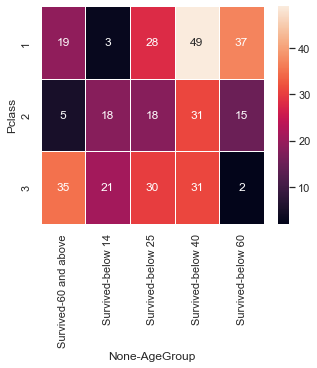

In [19]:
# Heat map age vs. Pclass, i.e. draw a heatmap with the numeric values in each cell

heat_data = full_data.loc[:,['Pclass', 'Age', 'Survived']]

def categorize_age(x):
    if x < 14: 
        return 'below 14'
    elif 14 <= x < 25:
        return 'below 25'
    elif 25 <= x < 40:
        return 'below 40'
    elif 40 <= x < 60:
        return 'below 60'
    else:
        return '60 and above'

heat_data['AgeGroup'] = heat_data['Age'].apply(categorize_age)
heat_data.drop('Age', axis = 1, inplace = True)

heat_data_agg = heat_data.groupby(['Pclass', 'AgeGroup']).sum()
heat_data_agg = heat_data_agg.unstack()

sns.set_theme()

f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(heat_data_agg, annot=True, fmt="d", linewidths=.5, ax=ax);

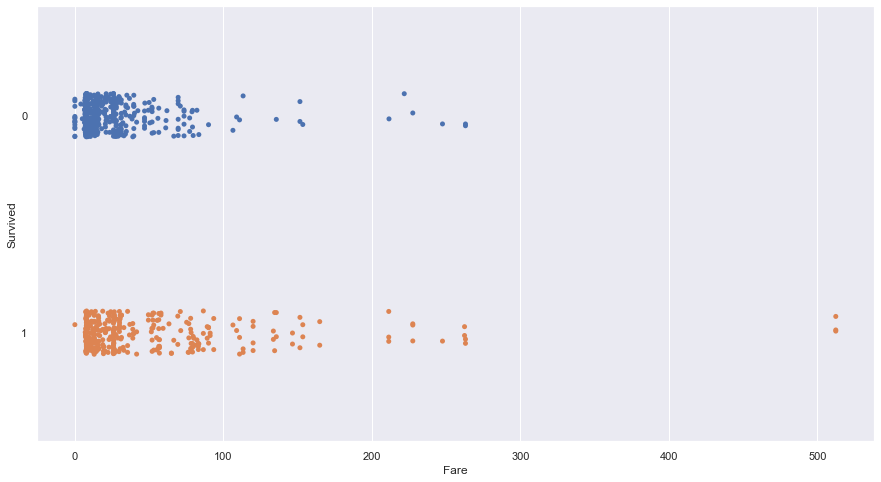

In [20]:
# Fares vs. survived
plt.figure(figsize=(15,8))
ax = sns.stripplot(x=full_data["Fare"], y=full_data["Survived"].astype(str), size = 5)
#ax.set(ylabel="")
plt.show()

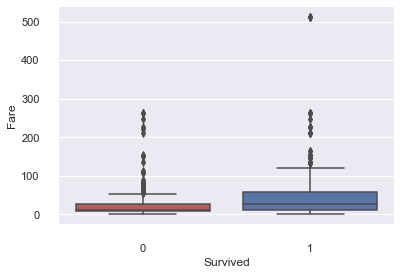

In [21]:
# Closer look on Fares (outliers)
sns.boxplot(x="Survived", y="Fare"
            , palette=["r", "b"],
            data=full_data)
sns.despine(offset=10, trim=True)

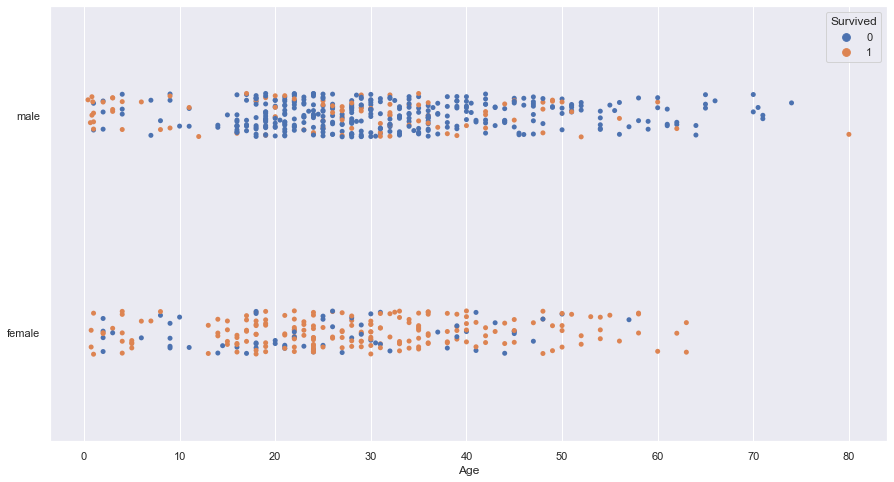

In [22]:
# Age vs. sex
plt.figure(figsize=(15,8))
ax = sns.stripplot(data=full_data, x="Age", y="Sex", hue="Survived", size = 5)
ax.set(ylabel="")
plt.show()

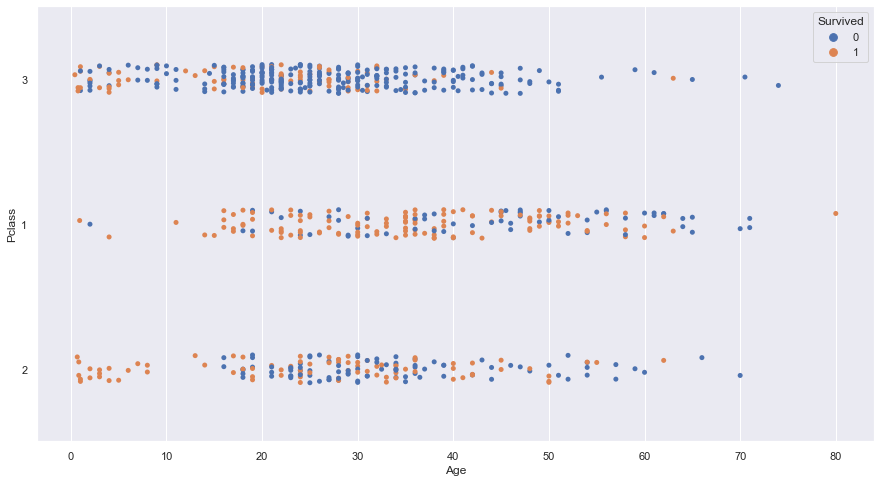

In [23]:
# Pclass vs. age
plt.figure(figsize=(15,8))
bx = sns.stripplot(x=full_data["Age"], y=full_data['Pclass'].astype(str), hue=full_data["Survived"], size = 5)
plt.show()

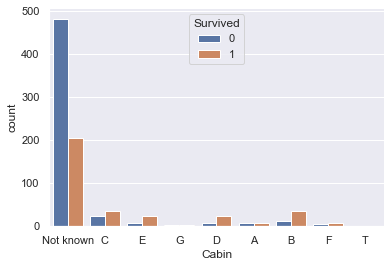

In [24]:
# Analyze Cabin information
def get_cabingroup(x):
    if str(x) != 'nan':
        return str(x)[0]
    else: 
        return 'Not known'

sns.countplot(data = full_data, x = full_data['Cabin'].apply(get_cabingroup), hue = full_data["Survived"])
sns.despine()

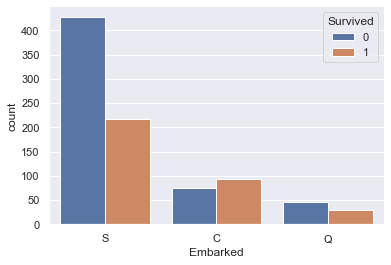

In [25]:
# Analyze Embarked information
sns.countplot(data = full_data, x = 'Embarked', hue = "Survived")
sns.despine()

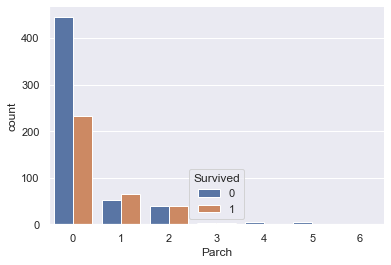

In [26]:
# Analyze Parch information
sns.countplot(data = full_data, x = 'Parch', hue = "Survived")
sns.despine()

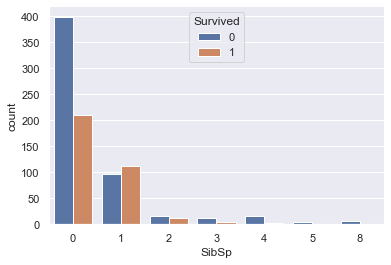

In [27]:
# Analyze SibSp information
sns.countplot(data = full_data, x = 'SibSp', hue = "Survived")
sns.despine()

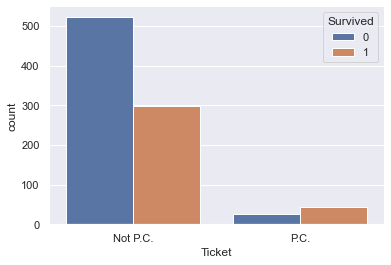

In [28]:
# Explore Ticket information
def extract_ca(x):
    if 'P' in x and 'C' in x:
        return 'P.C.'
    return 'Not P.C.'

sns.countplot(x = full_data['Ticket'].apply(extract_ca), hue = full_data["Survived"])
sns.despine()

# Logistic regression

## Engineer features

In [29]:
#Revisit the data summary
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Columns and summarizing thoughts for logisitc regression:__
+ `Pclass`: Since it is ordinal and already numeric, keep it as it is
+ `Name`: Length of name might be a useful feature
+ `Sex`: Categorical, but not ordinal, needs onehot encoding
+ `Àge`: Numerical data,  impute (e.g. mean of class), to be scaled, binning might be helpful
+ `SibSp`: Numerical data, scaling not necessary, binning might be helpful (yes/no)
+ `Parch`: Numerical data, potentially scalling not necessaary binning might be helpful (yes, no)
+ `Ticket`: Further analysis needed
+ `Fare`: Scaling definitely needed, outliers to be considered (see box plot)
+ `Cabin`: Extract first letter and length of number, ordinal, since A very top, F bottom
+ `Èmbarked`: Imputing (most frequent), extract first letter, onehot encoding, binning might be helpful

### Define pipelines 

In [30]:
# Import relevant modules and functionailties 
# Diable warnings
import warnings
warnings.filterwarnings('ignore')
# Imputing
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Ordinal
from sklearn.preprocessing import OrdinalEncoder
# OneHot
from sklearn.preprocessing import OneHotEncoder
# Bins
from sklearn.preprocessing import KBinsDiscretizer
# Customized transformer
from sklearn.preprocessing import FunctionTransformer
# Pipelines
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Column transformer
from sklearn.compose import ColumnTransformer
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
#Classifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
# Sex
sex_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [32]:
# Fare
fare_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    #PolynomialFeatures(degree=3, include_bias=False), # No effect here, AUC even decreases
    RobustScaler() # Handles outliers better than other scalers
)

In [33]:
# Age
def iter_imputing(df):
    data = pd.merge(df,
                    full_data.drop('Age', axis=1),
                    left_index=True,
                    right_index=True)
    res = iter_imputer.transform(
        data[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']])
    return res[:, -1].reshape(-1, 1)


# Test
# pd.DataFrame(iter_imputing(full_data[['Age']])).head(20), full_data[['Age']].head(20)

In [34]:
age_pipe = make_pipeline(
    #SimpleImputer(strategy='mean'),
    FunctionTransformer(iter_imputing),
    KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform'))

In [35]:
# Parch and Sibsp
def cus_bins(df):
    df_bins = df.copy()
    for idx, row in df.iterrows():
        for col in df.columns:
            if row[col] > 0:
                df_bins.loc[idx, col] = 1
            else:
                df_bins.loc[idx, col] = 0
    return df_bins.values.reshape(-1, 2)


#Test
#print(cus_bins(full_data[['Parch', 'SibSp']]))
#print(full_data[['Parch', 'SibSp']])

In [36]:
fam_pipe = make_pipeline(
    FunctionTransformer(cus_bins),
    #OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [37]:
def cabin_info(df):
    
    df = pd.DataFrame(df)
    
    #Extract the first letter (T = is counted as unknown = 'N'), e.g. C23 -> C
    letter_list = df.iloc[:, 0].apply(lambda x: str(x)[0].upper())
    for idx, item in letter_list.items():
        letter_list[idx] = item.replace('T', 'N')
    
    # Extract number of cabin and calculate length, e.g. C23 -> 23 -> 2    
    number_list = df.iloc[:, 0].apply(lambda x: str(x).upper())
    for idx, item in number_list.items():
        numbers = []
        for k in item.split():
            if k[0] != 'N' and not k[1:] in ['', ' ']:
                number = int(''.join([i for i in k if i.isdigit()]))
                numbers.append(number)
                number_list[idx] = len(str(round(np.mean(numbers))))
            else:
                number_list[idx] = 0
            
    # Concat both results and send as back as numpy array (-1, 2)        
    cabin_info = pd.concat([letter_list, number_list], axis = 1)
    return cabin_info.values.reshape(-1, 2)
    
#Test
#cabin_info(full_data[['Cabin']])

In [38]:
cab_pipe = make_pipeline(
    FunctionTransformer(cabin_info),
    OrdinalEncoder()
)

In [39]:
# Embarked
def first_letter(df):
    df = pd.DataFrame(df)
    first_letter = df.iloc[:,0].apply(lambda x: str(x)[0].upper())
    return first_letter.values.reshape(-1,1)

#Test
#first_letter(full_data[['Embarked']])

In [40]:
emb_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    FunctionTransformer(first_letter),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [41]:
# Ticket
def get_num_len(x):
    for i in x.split():
        try: 
            return len(str(int(i)))
        except: 
            return 0

def get_ticket_info(df):
    ticket_info = df.iloc[:,0].apply(get_num_len)
    return ticket_info.values.reshape(-1,1)
            
#Test
#print(get_ticket_info(full_data[['Ticket']]))

In [42]:
ticket_pipe = make_pipeline(
    FunctionTransformer(get_ticket_info),
)

In [43]:
# Name
def str_length(df):
    length = df.iloc[:,0].apply(lambda x: len(str(x)))
    return length.values.reshape(-1,1)

#Test
#str_length(full_data[['Name']])

In [44]:
name_pipe = make_pipeline(
    FunctionTransformer(str_length),
    MinMaxScaler()
)

### Summarize in columntransformer for preprocessing

In [45]:
# Define column transformers
full_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [46]:
feature_transform_log = ColumnTransformer([
    ('do_nothing', 'passthrough', ['Pclass']),
    ('onehot_encoding', sex_pipe, ['Sex']),
    ('scaling', fare_pipe, ['Fare']),
    ('impute_and_binning', age_pipe, ['Age']),
    ('binning', fam_pipe, ['Parch', 'SibSp']),
    ('get_first_letter', cab_pipe, ['Cabin']),
    ('impute_and_get_first_letter', emb_pipe, ['Embarked']),
    ('get_ticket_info', ticket_pipe, ['Ticket']),
    ('get_string_length', name_pipe, ['Name'])
])

#Test
#pd.DataFrame(feature_transform_log.fit_transform(X_train)).shape

In [47]:
# Currently done manually, automatic option could be here: 
#https://johaupt.github.io/blog/columnTransformer_feature_names.html

feature_columns_log = (['Pclass', 
                        'Sex_1', 'Sex_2', 
                        'Fare', 
                        'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
                        'Parch', 'SibSp',
                        'Cabin_1', 'Cabin_2'
                        'Embarked_1', 'Embarked_2', 'Embarked_3',
                        'Ticket',
                        'Name'
                       ])


## Create classifier

In [48]:
# Create classifier
clf_log = Pipeline(steps=[
                    ('preprocessor', feature_transform_log),
                    ('m_log', LogisticRegression(max_iter=10000))
])

In [49]:
# Fit classifier, fit iter_imputer before that to only fit on train data
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
iter_imputer.fit(X_train[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']])

clf_log.fit(X_train, y_train);

In [50]:
# Score on train data
clf_log.score(X_train, y_train)

0.797752808988764

In [51]:
# Score on test data
clf_log.score(X_test, y_test)

0.7932960893854749

## Evaluate classifier

In [52]:
# Roc-curve (AUC)
from sklearn.metrics import plot_roc_curve, roc_curve, auc
# Cross-validation
from sklearn.model_selection import cross_val_score
# Confusin matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Different scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [53]:
cross_val_score(clf_log, X_train, y_train, cv = 5, scoring='accuracy')

array([0.72027972, 0.7972028 , 0.8028169 , 0.79577465, 0.79577465])

In [54]:
cross_val_score(clf_log, X_train, y_train, cv = 5, scoring='accuracy').mean()

0.7823697429331233

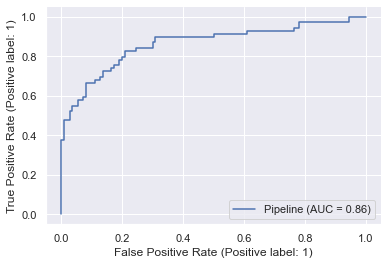

In [55]:
plot_roc_curve(clf_log, X_test, y_test)
sns.despine()

In [56]:
#Summary of metrics on test data
y_pred = clf_log.predict(X_test)
probabilities =  clf_log.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

print(f"""AUC = {round(roc_auc_score(y_test, probabilities),2)}
accuracy = {round(accuracy_score(y_test, y_pred),2)}
precision = {round(precision_score(y_test,y_pred),2)} 
recall = {round(recall_score(y_test,y_pred),2)}
f1 = {round(f1_score(y_test,y_pred),2)}
""")

AUC = 0.86
accuracy = 0.79
precision = 0.73 
recall = 0.74
f1 = 0.73



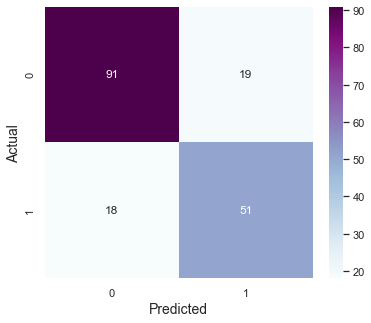

In [57]:
y_pred = clf_log.predict(X_test)

conf = confusion_matrix(y_test, y_pred)

def plot_heatmap(confusion):
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion,
                xticklabels = np.unique(y),
                yticklabels = np.unique(y),
                cmap = 'BuPu',
                annot=True,
                fmt='g'
                )

    # fmt is used to switch off scientific notation
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize = 14)
    
plot_heatmap(conf)

# Decision trees

In [58]:
# Import of kex modules & functionalities for decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Engineer features

Pipelines to be redesigned - no scalling needed, onehot encoding often not necessary, automatic feature selection

### Define pipelines

In [59]:
# Sex
sex_pipe_dt = make_pipeline(
    OrdinalEncoder()
)

In [60]:
# Fare
fare_pipe_dt = make_pipeline(
    SimpleImputer(strategy='mean')
)

In [61]:
# Age
age_pipe_dt = make_pipeline(
    #SimpleImputer(strategy='mean'),
    FunctionTransformer(iter_imputing),
)

In [62]:
# Cabin
cab_pipe_dt = make_pipeline(
    FunctionTransformer(cabin_info),
    OrdinalEncoder()
)

In [63]:
# Embarked
emb_pipe_dt = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    FunctionTransformer(first_letter),
    OrdinalEncoder()
)

In [64]:
# Ticket
ticket_pipe_dt = make_pipeline(
    FunctionTransformer(get_ticket_info),
)

In [65]:
# Name
name_pipe_dt = make_pipeline(
    FunctionTransformer(str_length),
)

### Summarize in columntransformer for preprocessing

In [66]:
feature_transform_dt = ColumnTransformer([
    ('do_nothing', 'passthrough', ['Pclass', 'Parch', 'SibSp']),
    ('sex_categorization', sex_pipe_dt, ['Sex']),
    ('fare_imputation', fare_pipe_dt, ['Fare']),
    ('age_imputing', age_pipe_dt, ['Age']),
    ('cab_first_letter', cab_pipe_dt, ['Cabin']),
    ('emb_first_letter', emb_pipe_dt, ['Embarked']),
    ('get_ticket_info', ticket_pipe, ['Ticket']),
    ('name_length', name_pipe_dt, ['Name'])
])

#Test
#pd.DataFrame(feature_transform_dt.fit_transform(X_train)).shape

In [67]:
# Currently done manually (see comment for log regression)
feature_names_dt = ([
                        'Pclas', 'Parch', 'SibSp',
                        'Sex',
                        'Fare',
                        'Age',
                        'Cabin_letter', 'Cabin_number',
                        'Embarked',
                        'Ticket',
                        'Name',
])

## Create classifier

In [68]:
# Create classifier
clf_dt = Pipeline(steps=[
                    ('preprocessor', feature_transform_dt),
                    ('m_dt', DecisionTreeClassifier(max_depth=5))
])

In [69]:
# Fit classifier, fit iter_imputer before that to only fit on train data
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
iter_imputer.fit(X_train[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']])

clf_dt.fit(X_train, y_train);

In [70]:
# Score on train data
clf_dt.score(X_train, y_train)

0.8567415730337079

In [71]:
# Score on test data
clf_dt.score(X_test, y_test)

0.8324022346368715

## Evaluate classifier

In [72]:
cross_val_score(clf_dt, X_train, y_train, cv = 5, scoring='accuracy')

array([0.78321678, 0.77622378, 0.82394366, 0.82394366, 0.78873239])

In [73]:
cross_val_score(clf_dt, X_train, y_train, cv = 5, scoring='accuracy').mean()

0.7950162513542794

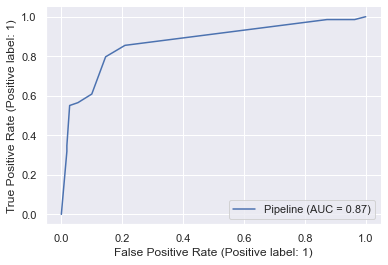

In [74]:
plot_roc_curve(clf_dt, X_test, y_test) 
sns.despine()

In [75]:
#Summary of metrics on test data
y_pred = clf_dt.predict(X_test)
print(f"""accuracy = {round(accuracy_score(y_test, y_pred),2)}
precision = {round(precision_score(y_test,y_pred),2)} 
recall = {round(recall_score(y_test,y_pred),2)}
f1 = {round(f1_score(y_test,y_pred),2)}
""")

accuracy = 0.83
precision = 0.77 
recall = 0.8
f1 = 0.79



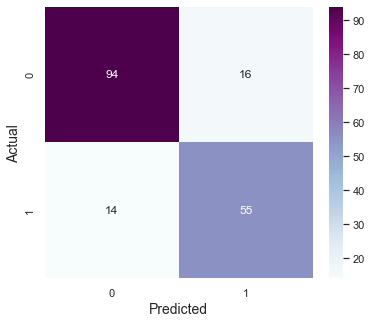

In [76]:
y_pred = clf_dt.predict(X_test)

conf = confusion_matrix(y_test, y_pred)

def plot_heatmap(confusion):
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion,
                xticklabels = np.unique(y),
                yticklabels = np.unique(y),
                cmap = 'BuPu',
                annot=True,
                fmt='g'
                )

    # fmt is used to switch off scientific notation
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize = 14)
    
plot_heatmap(conf)

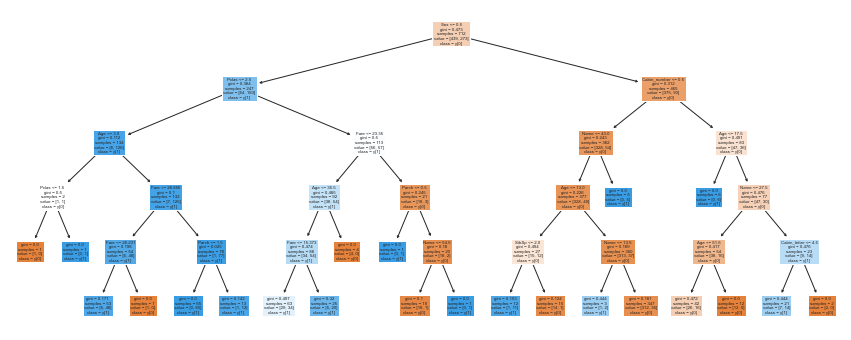

In [77]:
# Check tree and features used
plt.figure(figsize = (15,6))
plot_tree(clf_dt['m_dt'], feature_names = feature_names_dt, class_names = True, filled = True);

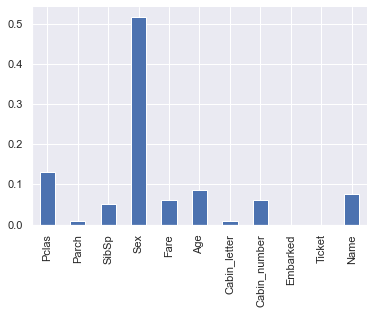

In [78]:
# Feature importance
importance = pd.DataFrame(clf_dt['m_dt'].feature_importances_)
importance.index = feature_names_dt
importance.sort_values(by = 0, ascending = False).head(10)

importance.plot.bar(legend=False)
sns.despine()

# Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier  

## Engineer features

_Feature pipeline for decision tree can be reused 1:1_

## Create classifier

In [80]:
# Create classifier
clf_rf = Pipeline(steps=[
                    ('preprocessor', feature_transform_dt),
                    ('m_rf', RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced_subsample'))
])

In [81]:
# Fit classifier, fit iter_imputer before that to only fit on train data
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
iter_imputer.fit(X_train[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']])

clf_rf.fit(X_train, y_train);

In [82]:
# Score on train data
round(clf_rf.score(X_train, y_train),3)

0.862

In [83]:
# Score on test data
round(clf_rf.score(X_test, y_test),3)

0.81

## Evaluate classifier

In [84]:
cross_val_score(clf_rf, X_train, y_train, cv = 5, scoring='accuracy')

array([0.76223776, 0.83916084, 0.83098592, 0.85915493, 0.79577465])

In [85]:
cross_val_score(clf_rf, X_train, y_train, cv = 5, scoring='accuracy').mean()

0.8161036146951639

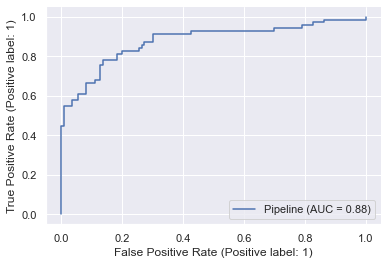

In [86]:
plot_roc_curve(clf_rf, X_test, y_test)  
sns.despine()

In [87]:
#Summary of metrics on test data
y_pred = clf_rf.predict(X_test)
print(f"""accuracy = {round(accuracy_score(y_test, y_pred),2)}
precision = {round(precision_score(y_test,y_pred),2)} 
recall = {round(recall_score(y_test,y_pred),2)}
f1 = {round(f1_score(y_test,y_pred),2)}
""")

accuracy = 0.81
precision = 0.72 
recall = 0.83
f1 = 0.77



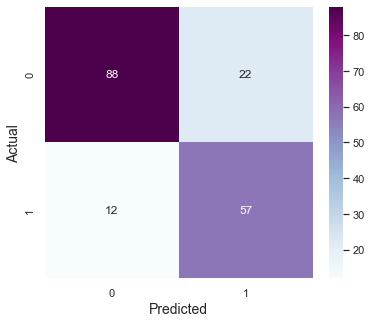

In [88]:
y_pred = clf_rf.predict(X_test)

conf = confusion_matrix(y_test, y_pred)

def plot_heatmap(confusion):
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion,
                xticklabels = np.unique(y),
                yticklabels = np.unique(y),
                cmap = 'BuPu',
                annot=True,
                fmt='g'
                )

    # fmt is used to switch off scientific notation
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize = 14)
    
plot_heatmap(conf)

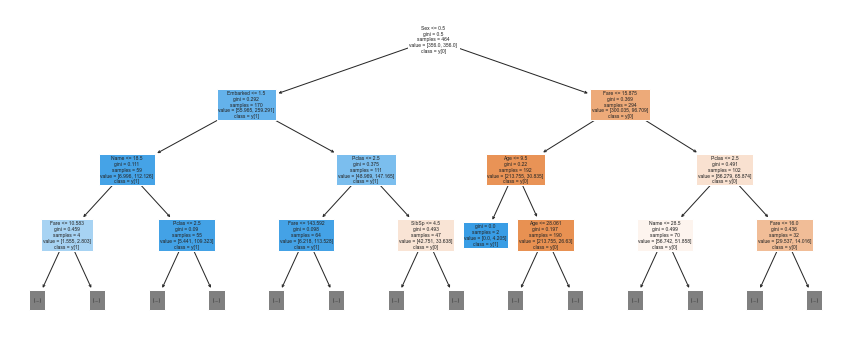

In [89]:
# Check tree and features used
plt.figure(figsize = (15,6))
plot_tree(clf_rf['m_rf'][0], feature_names = feature_names_dt, class_names = True, filled = True, max_depth = 3);

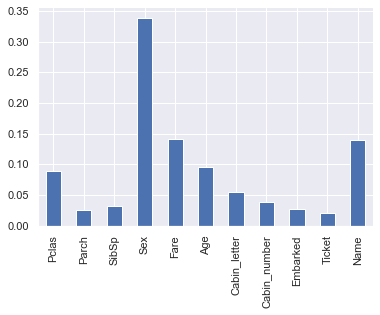

In [90]:
# Feature importance
importance = pd.DataFrame(clf_rf['m_rf'].feature_importances_)
importance.index = feature_names_dt
importance.sort_values(by = 0, ascending = False).head(10)

importance.plot.bar(legend=False)
sns.despine()

# Support Vector Machines

In [91]:
from sklearn.svm import SVC

## Engineer features

_Features from logistic regression can be reused_

## Create classifier

In [92]:
# Create classifier
clf_sv = Pipeline(steps=[
                    ('preprocessor', feature_transform_log),
                    ('m_sv', SVC(kernel='rbf', C=10, probability=True))
])

In [93]:
# Fit classifier, fit iter_imputer before that to only fit on train data
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
iter_imputer.fit(X_train[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']])

clf_sv.fit(X_train, y_train);

In [94]:
# Score on train data
round(clf_sv.score(X_train, y_train),3)

0.812

In [95]:
# Score on test data
round(clf_sv.score(X_test, y_test),3)

0.804

## Evaluate classifier

In [96]:
cross_val_score(clf_sv, X_train, y_train, cv = 5, scoring='accuracy')

array([0.74125874, 0.76223776, 0.78169014, 0.84507042, 0.77464789])

In [97]:
cross_val_score(clf_sv, X_train, y_train, cv = 5, scoring='accuracy').mean()

0.7809809908401457

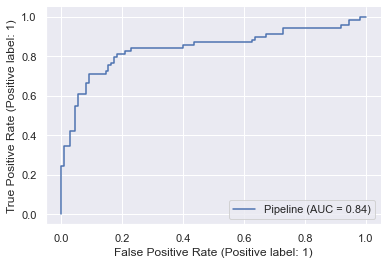

In [98]:
plot_roc_curve(clf_sv, X_test, y_test)  
sns.despine()

In [99]:
#Summary of metrics on test data
y_pred = clf_sv.predict(X_test)
print(f"""accuracy = {round(accuracy_score(y_test, y_pred),2)}
precision = {round(precision_score(y_test,y_pred),2)} 
recall = {round(recall_score(y_test,y_pred),2)}
f1 = {round(f1_score(y_test,y_pred),2)}
""")

accuracy = 0.8
precision = 0.74 
recall = 0.77
f1 = 0.75



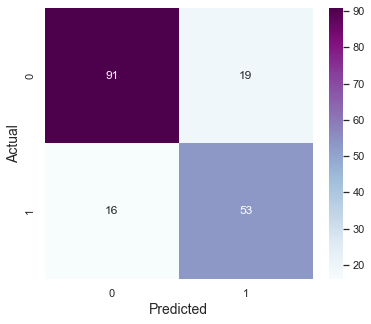

In [100]:
y_pred = clf_sv.predict(X_test)

conf = confusion_matrix(y_test, y_pred)

def plot_heatmap(confusion):
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion,
                xticklabels = np.unique(y),
                yticklabels = np.unique(y),
                cmap = 'BuPu',
                annot=True,
                fmt='g'
                )

    # fmt is used to switch off scientific notation
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize = 14)
    
plot_heatmap(conf)

# VotingClassifier (with all created models)

In [101]:
from sklearn.ensemble import VotingClassifier

## Engineer Features

_Features have been engineered in previous sections_

## Create classifier

In [102]:
clf_vot = VotingClassifier(estimators=[
        ('log',clf_log), 
        ('dt',clf_dt), 
        ('rf', clf_rf), 
        ('svm', clf_sv)],       
        voting='soft'
)

In [103]:
clf_vot.fit(X_train, y_train);

In [104]:
clf_vot.score(X_test, y_test)

0.8324022346368715

## Evaluate classifier

In [105]:
cross_val_score(clf_vot, X_train, y_train, cv = 5, scoring='accuracy')

array([0.72727273, 0.78321678, 0.85915493, 0.82394366, 0.8028169 ])

In [106]:
cross_val_score(clf_vot, X_train, y_train, cv = 5, scoring='accuracy').mean()

0.8020683541810303

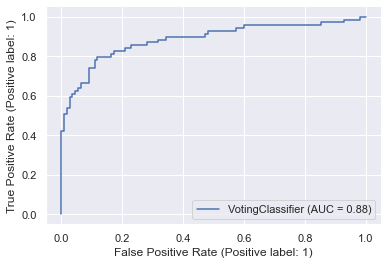

In [107]:
plot_roc_curve(clf_vot, X_test, y_test)
sns.despine()

In [108]:
#Summary of metrics on test data
y_pred = clf_vot.predict(X_test)
print(f"""accuracy = {round(clf_vot.score(X_test, y_test),2)}
precision = {round(precision_score(y_test,y_pred),2)} 
recall = {round(recall_score(y_test,y_pred),2)}
f1 = {round(f1_score(y_test,y_pred),2)}
""")

accuracy = 0.83
precision = 0.77 
recall = 0.8
f1 = 0.79



In [109]:
# Tuning the threshold to find optimal accuracy
probs = pd.DataFrame(clf_vot.predict_proba(X_train))

thr = 0
thr_opt = 0
accuracy_opt = None

while thr < 1:
    thr += 0.01
    probs['new_pred']=(probs[1]>thr).astype(int)
    accuracy = np.sum(y_train.reset_index().Survived == probs["new_pred"])/len(probs["new_pred"])
    if accuracy_opt == None or accuracy > accuracy_opt:
        accuracy_opt = accuracy
        thr_opt = thr

print(f'''thr_opt = {round(thr_opt,2)}
accuracy_opt = {round(accuracy_opt,3)}
''')

thr_opt = 0.51
accuracy_opt = 0.86



In [110]:
# Using optimal accuracy for test set
probs = pd.DataFrame(clf_vot.predict_proba(X_test))
probs['new_pred']=(probs[1]>thr_opt).astype(int)
accuracy_opt = np.sum(y_test.reset_index().Survived == probs["new_pred"])/len(probs["new_pred"])
accuracy_old = clf_vot.score(X_test, y_test)

print(f'Accuracy with optimized threshold = {round(accuracy_opt,3)}')
print(f'Accuracy with org. threshold = {round(accuracy_old, 3)}')

Accuracy with optimized threshold = 0.849
Accuracy with org. threshold = 0.832


# Summary of classifier performances

## Summarize model performances in heatmap

In [120]:
# Create table of key metrics through n=5 times "random cross-validation" on full data set.

summary = pd.DataFrame()

n = 5

list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []

for i in range(n):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.2, stratify=y)
    list_x_train.append(X_train_i)
    list_y_train.append(y_train_i)
    list_x_test.append(X_test_i)
    list_y_test.append(y_test_i)

for clf, name in zip([clf_log, clf_dt, clf_rf, clf_sv, clf_vot], 
                     ['log_reg', 'decision_tree', 'random_forest', 'support_vector','voting_clf']):

    l_auc = []
    l_accuracy = []
    l_precision = []
    l_recall = []
    l_f1 = []

    for X_train_i, y_train_i, X_test_i, y_test_i in zip(
            list_x_train, list_y_train, list_x_test, list_y_test):

        clf.fit(X_train_i, y_train_i)
        y_pred_i = clf.predict(X_test_i)
        probabilities = clf.predict_proba(X_test_i)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test_i, y_pred_i, pos_label=1)

        l_auc.append(roc_auc_score(y_test_i, probabilities))
        l_accuracy.append(accuracy_score(y_test_i, y_pred_i))
        l_precision.append(precision_score(y_test_i, y_pred_i))
        l_recall.append(recall_score(y_test_i, y_pred_i))
        l_f1.append(f1_score(y_test_i, y_pred_i))

    AUC = round(np.mean(l_auc), 2)
    accuracy = round(np.mean(l_accuracy), 2)
    precision = round(np.mean(l_precision), 2)
    recall = round(np.mean(l_recall), 2)
    f1 = round(np.mean(l_f1), 2)

    summary[name] = [AUC, accuracy, precision, recall, f1]

summary.index = ['AUC', 'accuracy', 'precision', 'recall', 'f1']
summary

,log_reg,decision_tree,random_forest,support_vector,voting_clf
AUC,0.85,0.83,0.87,0.84,0.87
accuracy,0.79,0.80,0.81,0.79,0.81
precision,0.74,0.79,0.74,0.75,0.78
recall,0.69,0.66,0.78,0.69,0.71
f1,0.71,0.72,0.76,0.72,0.75


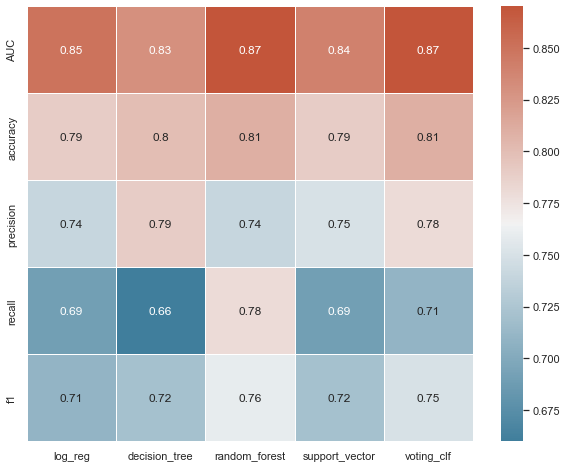

In [122]:
# Show results as heatmap
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(summary, annot=True, cmap=cmap, linewidths=.5, ax=ax)
f_name = '../images/overview_ml_kpis_1.png'
plt.savefig(f_name, dpi = 250)

## Tune threshold for VotingClassifier to maximize precision 

In [123]:
# Voting classifier tuned for high precision score

df = pd.DataFrame(clf_vot.predict_proba(X_train))

thr = 0
thr_opt = 0
precision_opt = None

while thr < 1:
    thr += 0.01
    df['new_pred'] = (df[1] > thr).astype(int)

    accuracy = accuracy_score(y_train, df.new_pred)
    precision = precision_score(y_train, df.new_pred)
    recall = recall_score(y_train, df.new_pred)
    f1 = f1_score(y_train, df.new_pred)

    if precision_opt == None or precision > precision_opt:
        precision_opt = precision
        thr_opt = thr

print(f'''thr_opt = {round(thr_opt,2)}
precision_opt = {round(precision_opt,3)}
''')

thr_opt = 0.91
precision_opt = 1.0



In [124]:
# Draw updated heatmap

l_auc = []
l_accuracy = []
l_precision = []
l_recall = []
l_f1 = []

for X_train_i, y_train_i, X_test_i, y_test_i in zip(list_x_train, list_y_train,
                                                    list_x_test, list_y_test):

    clf_vot.fit(X_train_i, y_train_i)
    probabilities = clf_vot.predict_proba(X_test_i)
    df = pd.DataFrame(probabilities)
    y_pred_i = (df[1] > thr_opt).astype(int)
    fpr, tpr, thresholds = roc_curve(y_test_i, y_pred_i, pos_label=1)

    l_auc.append(roc_auc_score(y_test_i, probabilities[:, 1]))
    l_accuracy.append(accuracy_score(y_test_i, y_pred_i))
    l_precision.append(precision_score(y_test_i, y_pred_i))
    l_recall.append(recall_score(y_test_i, y_pred_i))
    l_f1.append(f1_score(y_test_i, y_pred_i))

AUC = round(np.mean(l_auc), 2)
accuracy = round(np.mean(l_accuracy), 2)
precision = round(np.mean(l_precision), 2)
recall = round(np.mean(l_recall), 2)
f1 = round(np.mean(l_f1), 2)

summary['voting_clf'] = [AUC, accuracy, precision, recall, f1]

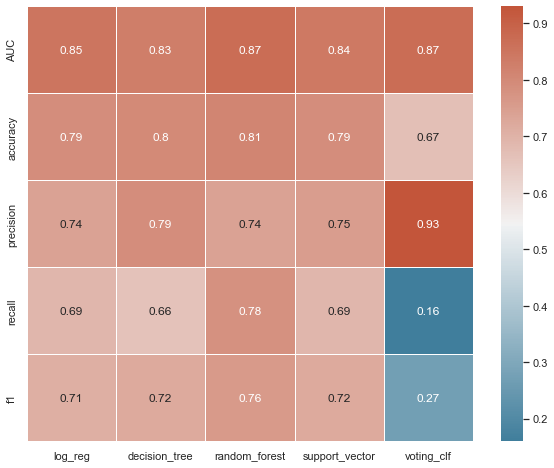

In [126]:
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(summary, annot=True, cmap=cmap, linewidths=.5, ax=ax)
f_name = '../images/overview_ml_kpis_2.png'
plt.savefig(f_name, dpi = 250)

# Export predictions to Kaggle

In [116]:
# Get test.data
X_test_kaggle = pd.read_csv('/Users/philipwitte/Documents/spiced_projects/fenugreek-encounter-notes/week2/data/test.csv')
X_test_kaggle.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
# Predict and merge the data
# Current classifier used: VotingClassifier

y_pred_kaggle = clf_vot.predict(X_test_kaggle)
y_pred_kaggle = X_test_kaggle[['PassengerId']].join(pd.DataFrame(y_pred_kaggle, columns = ['Survived']))
y_pred_kaggle.set_index('PassengerId', inplace = True)
y_pred_kaggle.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [118]:
y_pred_kaggle.to_csv('submission.csv')